In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn

import matplotlib.pyplot as plt
from matplotlib import style
import pickle


In [2]:
data = pd.read_csv("student-mat.csv", sep=";")

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
data.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
data=pd.get_dummies(data,drop_first=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   famrel             395 non-null    int64
 7   freetime           395 non-null    int64
 8   goout              395 non-null    int64
 9   Dalc               395 non-null    int64
 10  Walc               395 non-null    int64
 11  health             395 non-null    int64
 12  absences           395 non-null    int64
 13  G1                 395 non-null    int64
 14  G2                 395 non-null    int64
 15  G3                 395 non-null    int64
 16  school_MS          395 non-null    uint8
 17  sex_M           

In [10]:
data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


In [11]:
data = data[["G1", "G2", "absences","failures", "studytime","G3"]]

In [12]:
data.head()

,G1,G2,absences,failures,studytime,G3
0,5,6,6,0,2,6
1,5,5,4,0,2,6
2,7,8,10,3,2,10
3,15,14,2,0,3,15
4,6,10,4,0,2,10


In [13]:
import seaborn as sns

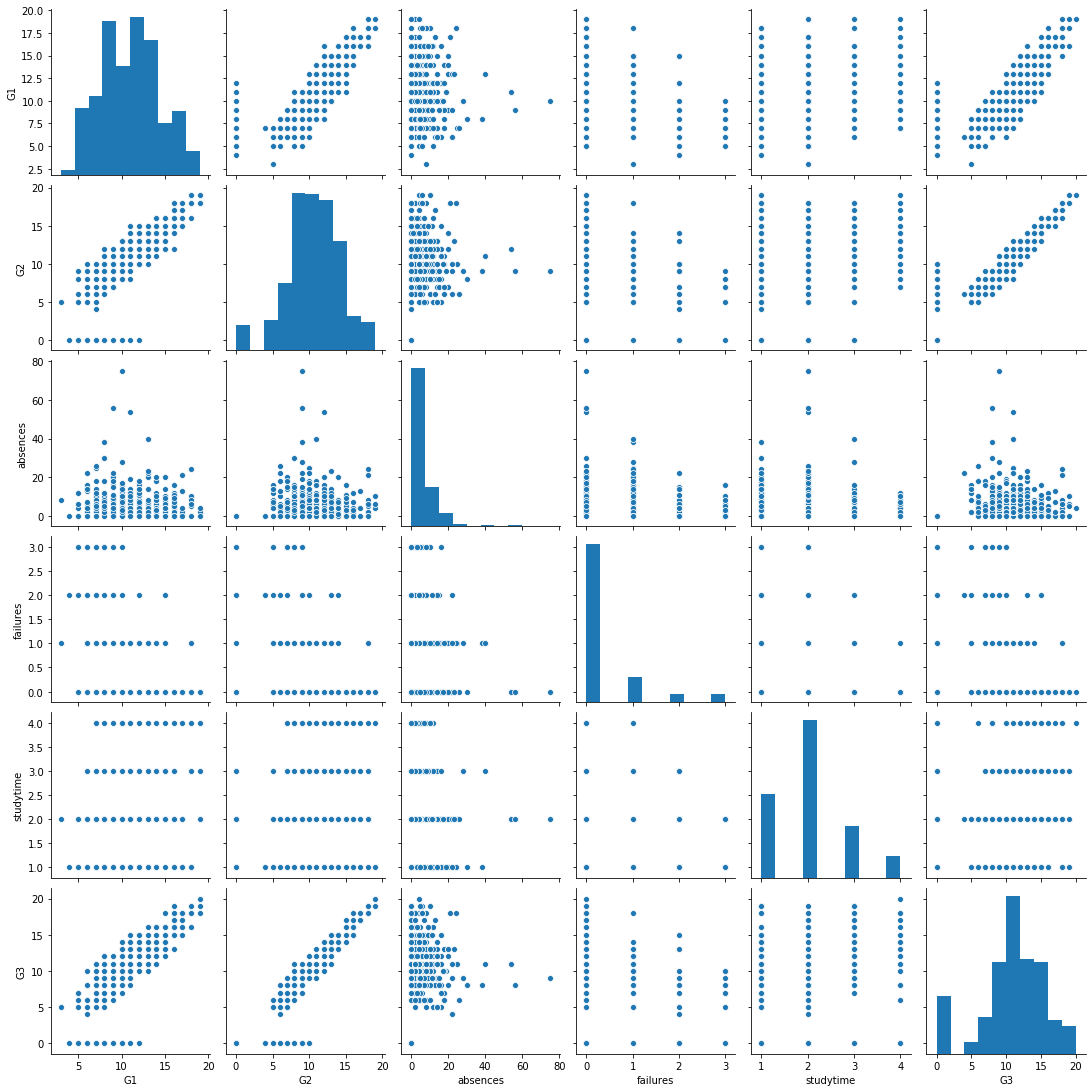

In [14]:
sns.pairplot(data)

In [15]:
data.corr()

,G1,G2,absences,failures,studytime,G3
G1,1.000000,0.852118,-0.031003,-0.354718,0.160612,0.801468
G2,0.852118,1.000000,-0.031777,-0.355896,0.135880,0.904868
absences,-0.031003,-0.031777,1.000000,0.063726,-0.062700,0.034247
failures,-0.354718,-0.355896,0.063726,1.000000,-0.173563,-0.360415
studytime,0.160612,0.135880,-0.062700,-0.173563,1.000000,0.097820
G3,0.801468,0.904868,0.034247,-0.360415,0.097820,1.000000


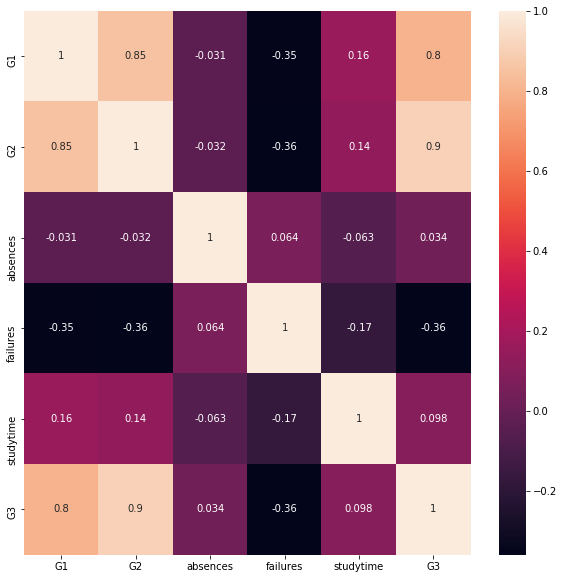

In [17]:
cor=data.corr()
fe=cor.index
plt.figure(figsize=(10,10))
g=sns.heatmap(data[fe].corr(),annot=True)

In [18]:
from sklearn.ensemble import ExtraTreesRegressor

In [19]:
x=data.drop(['G3'],axis=1)
y=data['G3']

In [20]:
x.head()

,G1,G2,absences,failures,studytime
0,5,6,6,0,2
1,5,5,4,0,2
2,7,8,10,3,2
3,15,14,2,0,3
4,6,10,4,0,2


In [21]:
y.head()

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

In [22]:
model=ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)

[0.28687771 0.57210243 0.07519143 0.02816761 0.03766081]


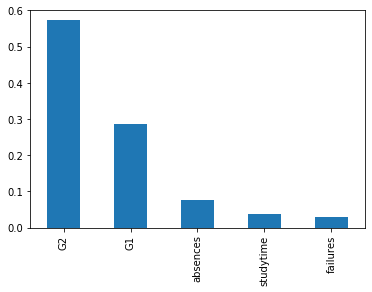

In [28]:
fet=pd.Series(model.feature_importances_,index=x.columns)
fet.nlargest(5).plot(kind='bar')
plt.show()

In [29]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
print(x_train,y_train)

     G1  G2  absences  failures  studytime
199   9   9         0         0          2
28   11  11         4         0          2
392  10   8         3         3          1
230  13  13        14         0          2
191   8   8         0         0          2
..   ..  ..       ...       ...        ...
219   9  10         4         0          3
232  11   9        14         0          2
25    6   9        14         2          1
358  10  10         4         0          1
187  15  15         0         0          2

[355 rows x 5 columns] 199    10
28     11
392     7
230    14
191     9
       ..
219    10
232     9
25      8
358    10
187    15
Name: G3, Length: 355, dtype: int64


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [32]:
cls=RandomForestRegressor()
cls.fit(x_train,y_train)
pre=cls.predict(x_test)

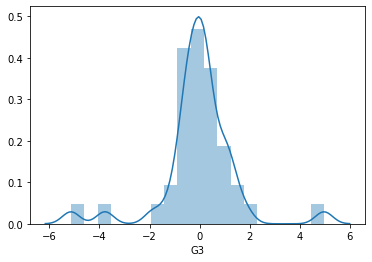

In [33]:
sns.distplot(y_test-pre)

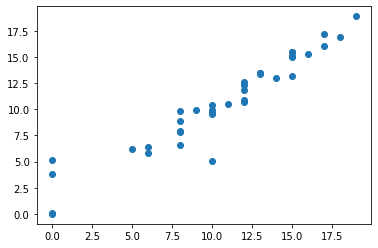

In [34]:
plt.scatter(y_test,pre)

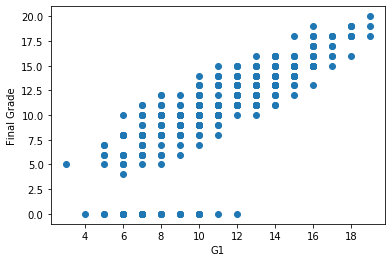

In [40]:
plot = "G1"
plt.scatter(data[plot], data["G3"])
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()



In [42]:
cls.score(x_test,y_test)

0.9075900191362193

In [43]:
cls2=LinearRegression()
cls2.fit(x_train,y_train)
pre1=cls2.predict(x_test)

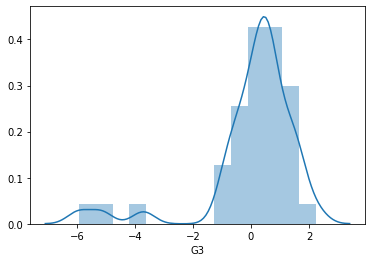

In [44]:
sns.distplot(y_test-pre1)

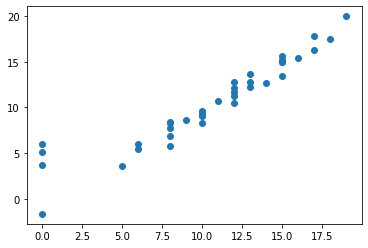

In [45]:
plt.scatter(y_test,pre1)

In [47]:
cls2.score(x_test,y_test)

0.8874218666846577

In [48]:
cls1=DecisionTreeRegressor()
cls1.fit(x_train,y_train)
pre2=cls2.predict(x_test)

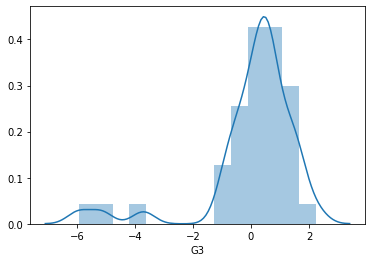

In [49]:
sns.distplot(y_test-pre2)

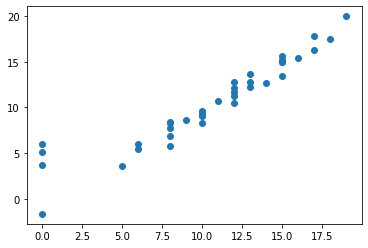

In [50]:
plt.scatter(y_test,pre2)

In [51]:
cls1.score(x_test,y_test)

0.7834350572866474